# Modeling

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import string, re
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

nltk.download("words")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

pd.set_option('display.max_columns', 10000)

[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


In [122]:
df=pd.read_csv('clean_df.csv',index_col=0)
df2=pd.read_csv('sentiment2.csv',index_col=0)

In [123]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    print(tokens)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [124]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)

    return text


In [125]:
df["target"]=df['emotion'].apply(lambda x: 0 if x=='Negative emotion' else( 1 if  x=="Positive emotion" else 2 ))

In [126]:
df["clean_tweet"]=[clean_text(x) for x in df["clean_tweet"]]

In [127]:
data = df['clean_tweet']
target = df['target']

In [128]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©'"\/","\\","\\x89ûï","\\x89ûï","\\x89ûï",
            'said', 'one', 'com', 'satirewire', '-', '–', '—', 'satirewire.com',"sxsw",'quo','rt','',"sxswi"]
sw_set = set(sw_list)

In [129]:
# applying the above function to our data/features 
processed_data = list(map(process_article, data))

['i', 'have', 'a', 'iphone', 'after', 'hrs', 'tweeting', 'at', 'rise', 'austin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', 'sxsw']
['jessedee', 'know', 'about', 'fludapp', 'awesome', 'ipad', 'iphone', 'app', 'that', 'you', 'll', 'likely', 'appreciate', 'for', 'its', 'design', 'also', 'they', 're', 'giving', 'free', 'ts', 'at', 'sxsw']
['swonderlin', 'can', 'not', 'wait', 'for', 'ipad', 'also', 'they', 'should', 'sale', 'them', 'down', 'at', 'sxsw']
['sxsw', 'i', 'hope', 'this', 'year', 's', 'festival', 'isn', 't', 'as', 'crashy', 'as', 'this', 'year', 's', 'iphone', 'app', 'sxsw']
['sxtxstate', 'great', 'stuff', 'on', 'fri', 'sxsw', 'marissa', 'mayer', 'google', 'tim', 'o', 'reilly', 'tech', 'books', 'conferences', 'amp', 'matt', 'mullenweg', 'wordpress']
['new', 'ipad', 'apps', 'for', 'speechtherapy', 'and', 'communication', 'are', 'showcased', 'at', 'the', 'sxsw', 'conference', 'http', 'ht', 'ly', 'iear', 'edchat', 'asd']
['sxsw', 'is', 'just', 's

['this', 'dude', 'next', 'to', 'me', 'is', 'holding', 'and', 'using', 'an', 'ipad', 'like', 'it', 's', 'a', 'trophy', 'sxsw', 'lookingforwardtothemusicfest']
['mention', 'nice', 'mention', 'store', 'huh', 'any', 'chance', 'we', 'can', 'meet', 'face', 'to', 'face', 'while', 'at', 'sxsw', 'today', 'or', 'sat', 'wan', 'na', 'talk', 'beer', 'amp', 'social']
['there', 'are', 'no', 'hard', 'feelings', 'towards', 'google', 'mention', 'says', 'they', 'would', 'make', 'a', 'great', 'partner', 'checkins', 'sxsw', 'pnid']
['mention', 'no', 'hack', 'they', 'found', 'people', 'jumping', 'over', 'the', 'corporate', 'firewall', 'e', 'g', 'using', 'google', 'docs', 'etc', 'hackingwork', 'sxsw']
['hope', 'it', 's', 'not', 'a', 'flop', 'akabuzz', 'mention', 'google', 'to', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', 'possibly', 'today', 'link', 'sxsw']
['it\x89ûªs', 'not', 'a', 'retreat', 'link', 'codes', 'valid', 'infektd', 'sxsw', 'cvdc']
['\x89ûï', 'mention', 'not', 'a', 'rumo

['in', 'fact', 'i', 'm', 'going', 'to', 'assume', 'a', 'priori', 'everyone', 'sitting', 'in', 'this', 'departure', 'terminal', 'playing', 'with', 'an', 'apple', 'product', 'is', 'going', 'to', 'sxsw']
['reasons', 'i', 'm', 'sad', 'i', 'm', 'not', 'at', 'sxsw', 'mention', 'in', 'the', 'form', 'of', 'link']
['i', 'think', 'i', 'm', 'the', 'only', 'one', 'mention', 'sxsw', 'with', 'an', 'iphone']
['dude', 'you', 're', 'at', 'an', 'outkast', 'concert', 'and', 'you', 're', 'tweeting', 'from', 'an', 'ipad', 'rt', 'mention', 'old', 'school', 'players', 'to', 'new', 'school', 'fools', 'sxsw']
['signs', 'you', 're', 'on', 'a', 'plane', 'to', 'sxsw', 'two', 'iphone', 'users', 'have', 'arcade', 'fire', 'rings', 'letsdothis']
['quot', 'you', 're', 'probably', 'using', 'your', 'ipad', 'on', 'the', 'go', 'quot', 'disagree', 'sxsw', 'uxdes']
['wow', 'they', 're', 'really', 'trying', 'to', 'tempt', 'me', 'to', 'pick', 'up', 'an', 'ipad', 'tomorrow', 'link', 'apple', 'sxsw', 'austintx']
['i', 'know', '

['so', 'brilliant', 'rosso', 'used', 'a', 'google', 'doc', 'to', 'paste', 'in', 'a', 'recipe', 'to', 'make', 'mothers', 'think', 'they', 'generated', 'a', 'recipe', 'for', 'her', 'leanstartup', 'sxsw']
['hello', 'gigantic', 'line', 'outside', 'google', 'v', 'bing', 'seo', 'session', 'sxsw', 'sxswi']
['what', 'company', 'company', 'has', 'the', 'best', 'supply', 'chain', 'walmart', 'and', 'apple', 'behance', 'sxsw']
['mention', 'any', 'idea', 'what', 'time', 'the', 'apple', 'store', 'at', 'sxsw', 'closes', 'tonight']
['is', 'there', 'any', 'way', 'of', 'deleting', 'an', 'app', 'that', 'won', 't', 'stop', 'loading', 'on', 'the', 'iphone', 'draining', 'my', 'power', 'but', 'no', 'x', 'to', 'cancel', 'help', 'me', 'sxsw']
['fast', 'company', 'sxsw', 'why', 'google', 'apple', 'ea', 'games', 'zynga', 'facebook', 'microsoft', 'and', 'intuit', 'went', 'gaga', 'for', 'the', 'go', 'game', 'link']
['why', 'does', 'anyone', 'do', 'a', 'product', 'just', 'for', 'one', 'thing', 'just', 'an', 'ipad',

['what', 's', 'the', 'best', 'site', 'for', 'registering', 'viewing', 'unofficial', 'sxsw', 'events', 'want', 'to', 'publicize', 'this', 'non', 'sxswi', 'archives', 'event', 'link']
['now', 'at', 'the', 'better', 'living', 'through', 'cloud', 'computing', 'sxsw', 'session', 'with', 'john', 'wiley', 'from', 'google', 'bettercloud']
['now', 'at', 'the', 'better', 'living', 'through', 'cloud', 'computing', 'sxsw', 'session', 'with', 'john', 'wiley', 'from', 'google', 'bettercloud', 'link', 'link']
['smartphone', 'breakdown', 'at', 'sxsw', 'unofficial', 'iphones', 'android', 'blackberry', 'symbian', 'windows', 'other']
['smart', 'move', 'by', 'apple', 'opening', 'popup', 'store', 'for', 'launch', 'in', 'downtown', 'austin', 'during', 'sxsw', 'link']
['foursquare', 'ceo', 'mention', 'sounded', 'open', 'minded', 'to', 'a', 'big', 'partnership', 'with', 'google', 'i', 'e', 'acquisition', 'sxsw', 'wallstreet']
['sxsw', 'e', 'cesar', 'chavez', 'st', 'austin', 'texas', 'link', 'sxsw']
['sweet', 

['google', 'presentation', 'by', 'mayer', 'is', 'a', 'sales', 'pitch', 'fail', 'sxsw']
['google', 'presentations', 'during', 'the', 'sxsw', 'trade', 'show', 'busy', 'trade', 'show', 'but', 'nice', 'to', 'be', 'on', 'the', 'other', 'side', 'this', 'time', 'link']
['google', 'presenting', 'hotpot', 'sxsw', 'sxswi', 'mention', 'austin', 'convention', 'center', 'w', 'mention', 'link']
['omgz', 'makeshift', 'sxsw', 'apple', 'store', 'is', 'in', 'a', 'golds', 'gym', 'link']
['sooo', 'design', 'for', 'ipads', 'session', 'is', 'just', 'an', 'hour', 'long', 'ad', 'for', 'me', 'to', 'buy', 'and', 'ipad', 'and', 'apps', 'amismarternow', 'sxsw']
['in', 'ipad', 'design', 'headaches', 'take', 'two', 'tablets', 'call', 'me', 'in', 'the', 'am', 'panel', 'excited', 'to', 'hear', 'mention', 'live', 'sxsw']
['the', 'web', 'designer\x89ûªs', 'guide', 'to', 'ios', 'and', 'android', 'apps', 'today', 'mention', 'a', 'm', 'link', 'sxsw']
['google', 'doesn', 't', 'place', 'any', 'value', 'on', 'your', 'domain'

['mention', 'if', 'you', 're', 'looking', 'for', 'a', 'space', 'to', 'escape', 'at', 'sxsw', 'why', 'don', 't', 'you', 'stop', 'by', 'arthaus', 'link']
['mention', 'if', 'you', 're', 'looking', 'for', 'a', 'space', 'to', 'network', 'and', 'mingle', 'at', 'sxsw', 'why', 'don', 't', 'you', 'stop', 'by', 'arthaus', 'check', 'it', 'out', 'link']
['mention', 'if', 'you', 're', 'looking', 'for', 'a', 'space', 'to', 'set', 'up', 'meetings', 'at', 'sxsw', 'why', 'don', 't', 'you', 'stop', 'by', 'arthaus', 'check', 'it', 'out', 'link']
['mention', 'if', 'you', 're', 'near', 'zen', 'on', 'guadalupe', 'or', 'at', 'trailer', 'space', 'that', 'night', 'i', 'm', 'playing', 'iphone', 'maurice', 'friend', 'of', 'mention', 'sxsw']
['still', 'a', 'big', 'line', 'outside', 'of', 'apple', 's', 'pop', 'up', 'shop', 'days', 'after', 'ipad', 's', 'debut', 'sxsw']
['see', 'so', 'big', 'my', 'links', 'smooshed', 'here', 's', 'google', 'realtime', 'for', 'sxsw', 'link']
['and', 'the', 'biggest', 'line', 'at', '

['google', 'will', 'eat', 'itself', 'rhizome', 'sxswk', 'sxsw', 'mention', 'hilton', 'link']
['omg', 'still', 'in', 'line', 'for', 'the', 'new', 'ipad', 'n', 'dieing', 'of', 'hunger', 'sxsw', 'who', 'else', 'is', 'in', 'line']
['welcome', 'all', 'ipad', 'owners', 'and', 'new', 'used', 'ipad', 'owners', 'there', 's', 'room', 'for', 'everyone', 'at', 'this', 'party', 'sxsw', 'postpc']
['google', 'will', 'launch', 'a', 'new', 'social', 'network', 'called', 'circles', 'link', 'focused', 'on', 'increased', 'privacy', 'amp', 'relevance', 'announced', 'at', 'sxsw']
['google', 'will', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', 'sxsw']
['google', 'soll', 'noch', 'heute', 'social', 'network', 'google', 'circles', 'starten', 'link', 'sxsw', 'via', 'mention', 'mention']
['google', 'will', 'not', 'launch', 'facebook', 'competitor', 'circles', 'mention', 'sxsw', 'today', 'as', 'thought', 'creeper', 'half', 'friends', 'the', 'world', 'over', 'disappointed']
['google', 'will',

['using', 'mention', 'at', 'sxsw', 'to', 'get', 'updates', 'on', 'the', 'temp', 'apple', 'store', 'line', 'up', 'super', 'impressed', 'by', 'the', 'potential', 'of', 'this', 'app', 'nice', 'work', 'yobongo']
['sxsw', 'mention', 'das', 'verpixelungsrecht\x89ûóthe', 'right', 'for', 'your', 'house', 'to', 'be', 'pixelated', 'in', 'google', 'street', 'view\x89ûó', 'is', 'a', 'theft', 'from', 'the', 'public']
['sxsw', 'mention', 'downloaded', 'the', 'torrent', 'need', 'to', 'put', 'it', 'on', 'my', 'iphone']
['quot', 'mention', 'google', 'to', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', 'possibly', 'today', 'link', 'sxsw', 'googlebook', 'or', 'twitgle', 'quot']
['quot', 'mention', 'google', 'to', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', 'possibly', 'today', 'link', 'sxsw', 'quot']
['quot', 'mention', 'google', 'to', 'launch', 'major', 'new', 'social', 'network', 'called', 'circles', 'possibly', 'today', 'link', 'sxsw', 'quot', 'mention']
['

['rt', 'mention', 'and', 'congress', 'in', 'the', 'scarborough', 'bldg', 'rt', 'mention', 'so', 'where', 'is', 'this', 'temporary', 'apple', 'store', 'setup', 'sxsw']
['rt', 'mention', 'hair', 'amp', 'makeup', 'station', 'at', 'mention', 'mention', 'sxsw', 'link']
['rt', 'mention', 'of', 'iphone', 'and', 'droid', 'apps', 'have', 'less', 'than', 'downloads', 'total', 'sxsw']
['rt', 'mention', 'of', 'farmers', 'own', 'mobile', 'phone', 'of', 'those', 'own', 'a', 'smartphone', 'marketshare', 'bb', 'android', 'iphone', 'mobilefarm', 'sxsw']
['rt', 'mention', 'a', 'browserwars', 'panel', 'without', 'apple', 'is', 'like', 'a', 'sxsw', 'without', 'parties']
['rt', 'mention', 'a', 'free', 'heat', 'map', 'app', 'of', 'check', 'ins', 'at', 'sxsw', 'see', 'mention', 'hot', 'spots', 'mention', 'sxsw', 'now', 'on', 'amp', 'iphone', 'wedig']
['rt', 'mention', 'a', 'free', 'heat', 'map', 'app', 'of', 'check', 'ins', 'at', 'sxsw', 'see', 'mention', 'hot', 'spots', 'mention', 'sxsw', 'now', 'on', 'amp'

['rt', 'mention', 'google', 's', 'marissa', 'mayer', 'on', 'the', 'location', 'based', 'fast', 'fun', 'and', 'future', 'link', 'sxsw', 'sxswi']
['rt', 'mention', 'google', 's', 'marissa', 'mayer', 'on', 'the', 'location', 'based', 'fast', 'fun', 'and', 'future', 'via', 'mention', 'link', 'sxswi', 'sxsw']
['rt', 'mention', 'google', 's', 'marissa', 'mayer', 'quot', 'the', 'mobile', 'phone', 'is', 'a', 'cursor', 'that', 'connects', 'the', 'physical', 'and', 'digital', 'worlds', 'quot', 'sxsw']
['rt', 'mention', 'google', 's', 'mobile', 'future', 'and', 'the', 'elusive', 'power', 'of', 'here', 'quot', 'sxsw', 'interactive', 'mention']
['rt', 'mention', 'google', 's', 'new', 'quot', 'route', 'around', 'quot', 'feature', 'gives', 'alternate', 'routes', 'to', 'avoid', 'traffic', 'collectively', 'saving', 'drivers', 'yrs', 'day', 'sxsw']
['rt', 'mention', 'google', 's', 'new', 'quot', 'route', 'around', 'quot', 'feature', 'gives', 'alternate', 'routes', 'to', 'avoid', 'traffic', 'collectively

['rt', 'mention', 'if', 'you', 'were', 'able', 'to', 'afford', 'to', 'attend', 'sxsw', 'or', 'buy', 'an', 'ipad', 'today', 'consider', 'saving', 'a', 'few', '\x89û', 'cont', 'link']
['rt', 'mention', 'if', 'you', 'were', 'able', 'to', 'afford', 'to', 'attend', 'sxsw', 'or', 'buy', 'an', 'ipad', 'today', 'consider', 'saving', 'a', 'few', 'for', 'link']
['rt', 'mention', 'if', 'you', 'were', 'able', 'to', 'afford', 'to', 'attend', 'sxsw', 'or', 'buy', 'an', 'ipad', 'today', 'consider', 'saving', 'a', 'few', 'for', 'japan', 'earthquake', 'relief']
['rt', 'mention', 'if', 'you', 'were', 'able', 'to', 'afford', 'to', 'attend', 'sxsw', 'or', 'buy', 'an', 'ipad', 'today', 'consider', 'saving', 'a', 'few', 'for', 'japan', 'earthquake', 'relief']
['rt', 'mention', 'if', 'you', 'were', 'able', 'to', 'afford', 'to', 'attend', 'sxsw', 'or', 'buy', 'an', 'ipad', 'today', 'consider', 'saving', 'a', 'few', 'for', 'japan', 'earthquake', 'relief', 'just', 'sayin']
['rt', 'mention', 'if', 'you', 'were',

['rt', 'mention', 'rumor', 'at', 'sxsw', 'that', 'google', 'will', 'launch', 'a', 'new', 'social', 'network', 'called', 'quot', 'circles', 'quot', 'link', 'mention']
['rt', 'mention', 'rumor', 'of', 'google', 'launching', 'their', 'new', 'social', 'network', 'called', 'circles', 'today', 'at', 'sxswi', 'sxsw', 'link']
['rt', 'mention', 'rumor', 'of', 'google', 'launching', 'their', 'new', 'social', 'network', 'called', 'circles', 'today', 'at', 'sxswi', 'sxsw', 'link']
['rt', 'mention', 'rumors', 'of', 'an', 'apple', 'store', 'opening', 'for', 'sxsw', 'at', 'amp', 'congress', 'all', 'signs', 'point', 'to', 'yes', 'link']
['rt', 'mention', 'rumours', 'cleared', 'gt', 'gt', 'rt', 'mention', 'we', 're', 'not', 'launching', 'any', 'products', 'at', 'sxsw', 'but', 'we', 're', 'doing', 'plenty', 'else', 'join', 'us', 'link']
['rt', 'mention', 'sam', 'has', 'unlocked', 'the', 'tightasstraveler', 'achievement', 'at', 'sxsw', 'using', 'google', 'maps', 'with', 'transit', 'instructions']
['rt', 

['tech', 'apple', 'saves', 'sxsw', 'set', 'to', 'open', 'pop', 'up', 'store', 'despite', 'having', 'two', 'other', 'austin', 'texas', 'locations', 'link', 'technology']
['smart', 'apple', 'sets', 'up', 'square', 'foot', 'temporary', 'store', 'at', 'sxsw', 'to', 'sell', 'new', 'ipads', 'test', 'potential', 'traffic', 'link', 'aapl']
['sxsw', 'apple', 'store', 'just', 'sold', 'their', 'last', 'ipad']
['at', 'the', 'apple', 'store', 'downtown', 'apple', 'should', 'really', 'keep', 'this', 'store', 'open', 'permanently', 'convience', 'and', 'location', 'sxsw']
['at', 'the', 'apple', 'store', 'that', 'they', 'literally', 'built', 'in', 'just', 'for', 'the', 'sxsw', 'conference', 'mention', 'apple', 'store', 'sxsw', 'link', 'photo']
['at', 'the', 'apple', 'store', 'with', 'mention', 'he', 's', 'buying', 'an', 'ipad', 'i', 'guess', 'this', 'is', 'what', 'geeks', 'do', 'when', 'they', 're', 'drunk', 'hahaha', 'sxsw']
['pop', 'up', 'apple', 'store', 'in', 'austin', 'mention', 'the', 'sxsw', 'li

['wishful', 'several', 'semis', 'filled', 'with', 'apple', 's', 'each', 'surrounded', 'by', 'tech', 'geek', 'masses', 'grab', 'a', 'box', 'amp', 'bump', 'pay', 'synching', 'and', 'joy', 'ensues', 'sxsw']
['sxsw', 'lbseverywhere', 'finkelstein', 'quot', 'location', 'aware', 'apps', 'ios', 'amp', 'android', 'quot']
['sxsw', 'dvsg', 'quot', 'best', 'chance', 'to', 'disrupt', 'visa', 'amp', 'master', 'card', 'are', 'facebook', 'apple', 'via', 'customers', 'amp', 'mobile', 'carriers', 'via', 'nfc', 'quot']
['sxsw', 'shades', 'of', 'blue', 'test', 'mention', 'link']
['pic', 'shades', 'of', 'blue', 'google', 'test', 'sxsw', 'metricsdrivendesign', 'link']
['just', 'finished', 'taking', 'photos', 'in', 'the', 'google', 'photobooth', 'you', 'know', 'i', 'heart', 'you', 'sxsw', 'mention', 'maggie', 'mae', 's', 'w', 'others', 'link']
['just', 'finished', 'up', 'a', 'long', 'day', 'and', 'ready', 'to', 'do', 'it', 'again', 'tomorrow', 'starting', 'with', 'mention', 'event', 'and', 'ending', 'with',

['the', 'industry', 'party', 'gsdm', 'google', 'was', 'a', 'grand', 'affair', 'sxsw']
['got', 'lost', 'trying', 'to', 'fond', 'the', 'apple', 'store', 'in', 'austin', 'so', 'mention', 'instead', 'sxsw']
['ipad', 'is', 'its', 'own', 'thing', 'in', 'addition', 'to', 'not', 'in', 'place', 'of', 'print', 'mention', 'cuts', 'through', 'the', 'sxsw', 'b', 's', 'at', 'newsapps', 'panel']
['apple', 'rents', 'retail', 'space', 'downtown', 'austin', 'for', 'sxsw', 'link', 'must', 'avoid', 'block', 'radius', 'tomorrow', 'via', 'mention']
['ipad', 'gets', 'temporary', 'apple', 'store', 'for', 'sxsw', 'link', 'apple', 'applestore', 'sxsw', 'verizon']
['apple', 'sets', 'up', 'temporary', 'store', 'for', 'link', 'im', 'a', 'lil', 'jealous', 'sxsw', 'mention', 'mention', 'mention']
['first', 'shots', 'w', 'ipad', 'from', 'sxsw', 'link']
['sxsw', 'letshookup', 'mention', 'quot', 'we', 'want', 'to', 'be', 'the', 'google', 'of', 'nonprofits', 'quot']
['are', 'you', 'attending', 'the', 'sxsw', 'and', 'wan

In [130]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

9245

In [131]:
# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [132]:
X_lem = lemmatized_output
# [' '.join(d) for d in processed_data]

y_lem = target
# X[3]

In [133]:
df["clean_tweet"]=X_lem

In [134]:
df=pd.get_dummies(df,columns=['company','brand'],drop_first=True)

In [153]:
df=df.drop(["tweet",'lemming_tweet','clean_tweet',"emotion"],axis=1)

KeyError: "['tweet' 'lemming_tweet' 'clean_tweet'] not found in axis"

In [151]:
data=df[df.columns[(df.columns!="target")]]
data=df[df.columns[(df.columns!='tweet')]]


In [148]:
dense_matrix = np.array(data.as_matrix(columns = None), dtype=bool).astype(np.int)
sparse_matrix = scipy.sparse.csr_matrix(dense_matrix)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [152]:
data

,emotion,target,company_Apple,company_Apple & Android,company_Apple & Google,company_Google,company_Ipad & Android,company_Ipad & Google,company_Iphone & Android,company_Iphone & Google,company_Ipod,company_Mac,company_Mac & Android,company_Other Apple product or service,company_Other Google product or service,company_iPad,company_iPad or iPhone App,company_iPhone,brand_Google
0,Negative emotion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Positive emotion,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Positive emotion,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Negative emotion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Positive emotion,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,Positive emotion,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9088,No emotion toward brand or product,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9089,No emotion toward brand or product,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9090,No emotion toward brand or product,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [118]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer()

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<19x18 sparse matrix of type '<class 'numpy.float64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [119]:
rf_classifier_lem = RandomForestClassifier(n_estimators=100, random_state=0)

In [120]:
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

ValueError: Found input variables with inconsistent numbers of samples: [19, 7273]

In [115]:
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem,average="micro")
print('Random Forest with Lemmatization Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features
Testing Accuracy: 0.6723

F1 Score: 0.6723


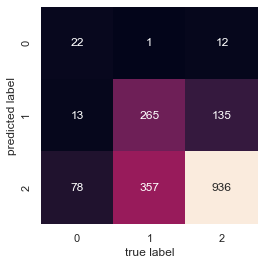

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1','2'], yticklabels=['0', '1',"2"])
plt.xlabel('true label')
plt.ylabel('predicted label');